# **Summary**
This notebook will perform Exploratory Data Analysis (EDA) to mainly identify and explore patterns, anomalies, relationships between variables and perform data quality checks (missing values, outliers, duplicates, etc) to make informed decisions about data cleaning and preprocessing.

**Business Questions:**
- What was the turnover rate? What was the retention rate? What is the overall net growth of the company?
- Is there a relationship between employee satisfaction (engagement) and their performance?
- How is the employee engagement rate based on age, gender, and race?
- Is there any relationship between who a person works for and their performance score? What about their satisfaction?
- What is the overall diversity profile of the organization?
- What are our best recruiting sources if we want to ensure a diverse organization?
- Are there areas of the company where pay is not equitable?
- Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?

## **1. First Look**
Will set up the notebook by importing libraries that this notebook will need to manipulate the dataset, while loading in the dataset to gain an initital look and understanding of the variables, dataframe shape, and potential anomalies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


pd.set_option('display.max_columns', None)
df = pd.read_csv("HRDataset_v14.csv")

In [ ]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
def speed_date(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")

    print("\n\033[1mPercentage of null values in columns:\033[0m")
    percent_null = df.isnull().sum() / len(df) * 100
    percent_null_columns = percent_null[percent_null > 0]
    if len(percent_null_columns) > 0:
        for col, percent in percent_null_columns.items():
            print(f"\033[1m{col}\033[0m: {percent:.2f}%")

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()

speed_date(df)


Shape of DataFrame:  (311, 36)

Columns in DataFrame:  ['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   3

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


**Insights:**
- **State & Zip:** may be redundant info for ML--may use *Zip*, can possibly map states to region.
- **GenderID & Sex:** possible use of *GenderID* for ML, need to check if info is consistent with *Sex* per employee.
- **Other Notes:** many ID's provide redundant info for ML, be sure to have an initial round of feature selection (e.g. "MaritalDesc" vs "MaritalStatusID"). More info will be provded when visualizing corr matrix.

In [ ]:
# display unique values of categorical variables
cat_var = df.select_dtypes(include=['object']).columns.difference(["Employee_Name"])
for col in cat_var:
    print(f"\033[1m{col}\033[0m: {df[col].unique()}\n")

CitizenDesc: ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']

DOB: ['07/10/83' '05/05/75' '09/19/88' '09/27/88' '09/08/89' '05/22/77'
 '05/24/79' '02/18/83' '02/11/70' '01/07/88' '01/12/74' '02/21/74'
 '07/04/88' '07/20/83' '07/15/77' '10/18/81' '04/17/66' '10/27/70'
 '04/04/86' '04/06/79' '12/22/70' '12/27/58' '09/01/89' '09/21/90'
 '01/16/67' '07/30/64' '04/04/87' '03/10/70' '08/24/90' '11/24/87'
 '07/28/83' '10/30/69' '06/01/64' '03/02/80' '08/19/77' '11/22/66'
 '08/09/83' '04/05/87' '02/02/83' '06/06/86' '05/15/63' '01/02/51'
 '02/09/72' '02/12/79' '08/24/83' '06/11/70' '08/27/83' '05/31/88'
 '09/05/85' '08/31/81' '11/25/78' '08/26/80' '09/08/77' '08/12/79'
 '12/17/75' '03/19/83' '03/31/77' '08/26/86' '04/10/87' '09/09/65'
 '04/19/90' '01/18/52' '11/05/78' '09/14/79' '04/15/88' '10/31/77'
 '07/05/79' '11/02/75' '02/25/51' '04/19/67' '09/04/83' '11/15/82'
 '05/14/87' '12/02/78' '10/07/86' '07/18/88' '07/09/70' '11/08/88'
 '11/28/73' '09/23/73' '09/05/91' '05/31/74' '08/25/78' '08

**Insights:**
- **DOB:** dtype=object, in a MM/DD/YYYY format --> make age column.
- **DateofHire**, **LastPerformanceReview_Date** & **DateofTermination:** dtype=object, in a MM/DD/YYYY format --> poosibly aggregate by year, month, and quarter.
- **Department:** "Production    " value may have leading spaces
- **Sex:** "M    " value may have leading spaces
- **HispanicLatino:** has four unique values, two being duplicates of the other values but with capitalization differences.
- **Other Notes:** Dataset records from 2012 to 2019.

## **2. Cleaning Dataset**

In [ ]:
# fixing leading space in Department
df['Department'] = df['Department'].str.strip()
df['Sex'] = df['Sex'].str.strip()

# ensure consistent unique values (remove duplicate) for HispanicLatino column
df['HispanicLatino'] = df['HispanicLatino'].str.capitalize()

print(df['Department'].unique())
print(df['HispanicLatino'].unique())
print(df['Sex'].unique())

['Production' 'IT/IS' 'Software Engineering' 'Admin Offices' 'Sales'
 'Executive Office']
['No' 'Yes']
['M' 'F']


In [ ]:
# handling DateofTermination missing values

today = pd.to_datetime('2019-12-31')
active = pd.to_datetime('2099-12-31')
df.loc[(df['Termd'] == 1) & (df['DateofTermination'].isnull()), 'DateofTermination'] = today # terminated employees fill with reference date
print(df['DateofTermination'].isnull().sum())

207


For now will keep the active employees date of termination as null values.

In [ ]:
# handling ManagerID missing values

manager_id_mapping = df.dropna(subset=['ManagerID']).set_index('ManagerName')['ManagerID'].to_dict()
df['ManagerID'] = df.apply(lambda x: manager_id_mapping.get(x['ManagerName'], pd.NA) if pd.isnull(x['ManagerID']) else x['ManagerID'], axis=1)
print(df['ManagerID'].isnull().sum())

0


In [ ]:
# mapping TermReason to simpler categories

term_reason_simple = {
    'N/A-StillEmployed': 'Still Employed',
    'Employed Still': 'Still Employed',
    'career change': 'Career Change',
    'hours': 'Attendance',
    'return to school': 'Education',
    'Another position': 'Better Opportunity',
    'unhappy': 'Employee Dissatisfaction',
    'attendance': 'Attendance',
    'performance': 'Performance Issues',
    'Learned that he is a gangster': 'Other',
    'retiring': 'Retirement or Relocation',
    'relocation out of area': 'Retirement or Relocation',
    'more money': 'Better Opportunity',
    'military': 'Career Change',
    'no-call, no-show': 'Attendance',
    'Fatal attraction': 'Other',
    'maternity leave - did not return': 'Health-Related',
    'medical issues': 'Health-Related',
    'gross misconduct': 'Performance Issues'
}

df['TermReason'] = df['TermReason'].map(term_reason_simple)
df['TermReason'].head()

,TermReason
0,Still Employed
1,Career Change
2,Attendance
3,Still Employed
4,Education


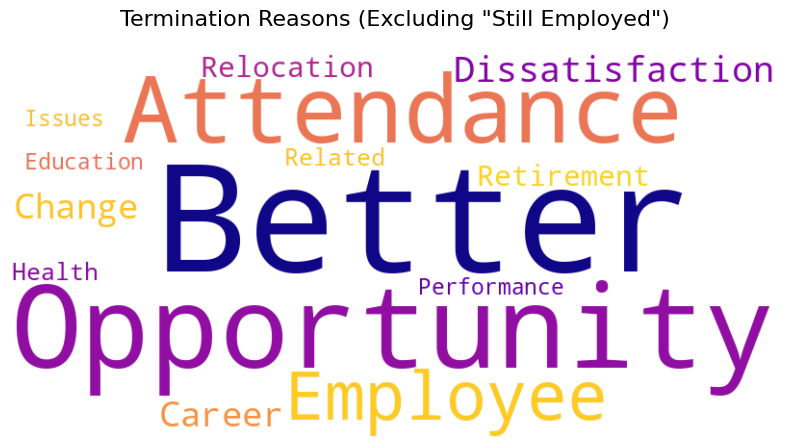

In [ ]:
filtered_reasons = df[df['TermReason'] != 'Still Employed']['TermReason']
mapped_text = ' '.join(filtered_reasons.dropna().astype(str))

# generate word cloud
if len(mapped_text.strip()) > 0:
    mapped_wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=set(STOPWORDS),
        collocations=False,
        colormap='plasma'
    ).generate(mapped_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(mapped_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Termination Reasons (Excluding "Still Employed")', size=16, pad=20)
    plt.show()
else:
    print("No termination reasons left after filtering!")

## **3. Visualization**
Will visualize the features to provide further insights into patterns, outliers, and relationships between variables.

In [ ]:
# change dtype of date columns
df["DOB"] = pd.to_datetime(df["DOB"], errors='coerce')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')
df["LastPerformanceReview_Date"] = pd.to_datetime(df["LastPerformanceReview_Date"], errors='coerce')

<ipython-input-20-189c6d02a67d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOB"] = pd.to_datetime(df["DOB"], errors='coerce')


### **3.1 Feature Selection**
As we deal with people analytics/human resources, this dataset is missing important KPI's, additional information for a business, and additional context per employee that may be beneficial in detecting turnover such as:
- Age
- Tenure
- Diversity fair performance
- Salary/department average ratio
- Performance score/department perf. average
- Days since last performance review

In [ ]:
# create Age column
from datetime import date

def calculate_age(born):
    today = pd.to_datetime('2019-12-31') # reference date (Dec 31st 2019)
    if born > today:
        born = born.replace(year=born.year - 100)
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return age

df['Age'] = df['DOB'].apply(calculate_age)

print(df[['DOB', 'Age']].head())

         DOB  Age
0 1983-07-10   36
1 1975-05-05   44
2 1988-09-19   31
3 1988-09-27   31
4 1989-09-08   30


**Created new Age column that calculates the age of employees as of December 31, 2019 (last record of the dataset being altered/database recording).**

*After visualization of DOB and Age:*
- Discovered there are negative ages because
- There are DOB after the reference date we are using
- Many of the negative DOB establish a pattern of years occurring after 2045.

*We can:*

1. convert all of these ages to 0 (or as missing values)
2. assume the DOB entries are entered wrong (e.g. 2067 = 1967), so those years actually occur 100 years prior to the date entered

**Will proceed with option 2, as option 1 may take away a chunk of data, while option 2 will preserve data and also fix the data in the DOB column.**

In [ ]:
# create Tenure column
# '2019-12-31'
def calculate_tenure(row):
    today = pd.to_datetime('2019-12-31')
    if row['Termd'] == 1 and not pd.isnull(row['DateofTermination']):
        tenure = (row['DateofTermination'] - row['DateofHire']).days / 365.25 # check if terminated, calc tenure from hire and term date
    else:
        return (today - row['DateofHire']).days / 365.25  # or calc tenure from hire to reference date

    return max(tenure, 0)

df['Tenure'] = df.apply(calculate_tenure, axis=1)
print(df[['DateofHire', 'DateofTermination', 'Tenure']].head())

  DateofHire DateofTermination     Tenure
0 2011-07-05               NaT   8.490075
1 2015-03-30        2016-06-16   1.215606
2 2011-07-05        2012-09-24   1.223819
3 2008-01-07               NaT  11.980835
4 2011-07-11        2016-09-06   5.158111


Tenure provides insights into an employee's length of service which gives the company information about it's retention rate. Additionally, the company may be able to see which factors are affecting this rate such as satisfaction, performance, and retention risk.

For the employee, tenure can indicate compensation adjustments, benefits or promotions.

In [ ]:
# create diversity status column
df['DiversityStatus'] = df.apply(lambda x: 'Diverse'
                                 if x['FromDiversityJobFairID'] == 1
                                 or x['HispanicLatino'] == 1
                                 or x['RaceDesc'] != 'White'
                                 else 'Non-Diverse', axis=1)

print(df[['FromDiversityJobFairID', 'HispanicLatino', 'RaceDesc', 'DiversityStatus']].head())

   FromDiversityJobFairID HispanicLatino RaceDesc DiversityStatus
0                       0             No    White     Non-Diverse
1                       0             No    White     Non-Diverse
2                       0             No    White     Non-Diverse
3                       0             No    White     Non-Diverse
4                       0             No    White     Non-Diverse


Diversity Status will indicate if an employee is a diverse hire based on race, Hispanic/Latino status, and whether they were recruited from a diversity job fair. This indicator will give the business information about the diversity of their employees, and how effective the diversity job fair is in recruitment furthing efforts in DEI (Diversity, Equity, and Inclusion).

In [ ]:
# create salary columns

df['DeptAverageSalary'] = df.groupby('DeptID')['Salary'].transform('mean') # average salary by department
df['Salary_Dept_Ratio'] = df['Salary'] / df['DeptAverageSalary'] # employee salary to department average salary

print(df[['DeptID', 'Salary', 'DeptAverageSalary', 'Salary_Dept_Ratio']].head())

   DeptID  Salary  DeptAverageSalary  Salary_Dept_Ratio
0       5   62506       59967.788462           1.042326
1       3  104437       97064.640000           1.075953
2       5   64955       59967.788462           1.083165
3       5   64991       59967.788462           1.083765
4       5   50825       59967.788462           0.847538


A ratio comparing employee salary to the average salary in their department can indicate compensation factors.

In [ ]:
# create performance standard column

df['DeptAveragePerfScore'] = df.groupby('DeptID')['PerfScoreID'].transform('mean') # average performance score by department
df['PerformanceStandard'] = (df['PerfScoreID'] >= df['DeptAveragePerfScore']).astype(int) # employee performance score to department average performance

print(df[['DeptID', 'PerfScoreID', 'DeptAveragePerfScore', 'PerformanceStandard']].head())

   DeptID  PerfScoreID  DeptAveragePerfScore  PerformanceStandard
0       5            4              2.980769                    1
1       3            3              3.060000                    0
2       5            3              2.980769                    1
3       5            3              2.980769                    1
4       5            3              2.980769                    1


Performance standard measures if an employee is performing consistently with the standards of the rest of the department. This will indicate if performance standards is an indicator of salary and absenteeism.

In [ ]:
# create days since last perf. review column

df['DaysSinceLastReview'] = (
    (df['DateofTermination'].fillna(today) - df['LastPerformanceReview_Date']).dt.days
)

print(df[['LastPerformanceReview_Date', 'DateofTermination', 'DaysSinceLastReview']].head())

  LastPerformanceReview_Date DateofTermination  DaysSinceLastReview
0                 2019-01-17               NaT                  348
1                 2016-02-24        2016-06-16                  113
2                 2012-05-15        2012-09-24                  132
3                 2019-01-03               NaT                  362
4                 2016-02-01        2016-09-06                  218


Calculating the days since an employee's last performance review can identify patterns in employee's satisfaction and performance. Additionally, this can identify when an employee is overdue for feedback.

This would be an even better indicator if information quarterly or yearly was given. regardless, this column may still provide insights.

In [ ]:
# aggregate dates by year
df_sub = df.copy() # create copy of dataset
df_sub["DateofHire_Year"] = df["DateofHire"].dt.year
df_sub["DateofTermination_Year"] = df["DateofTermination"].dt.year
df_sub["LastPerformanceReview_Year"] = df["LastPerformanceReview_Date"].dt.year

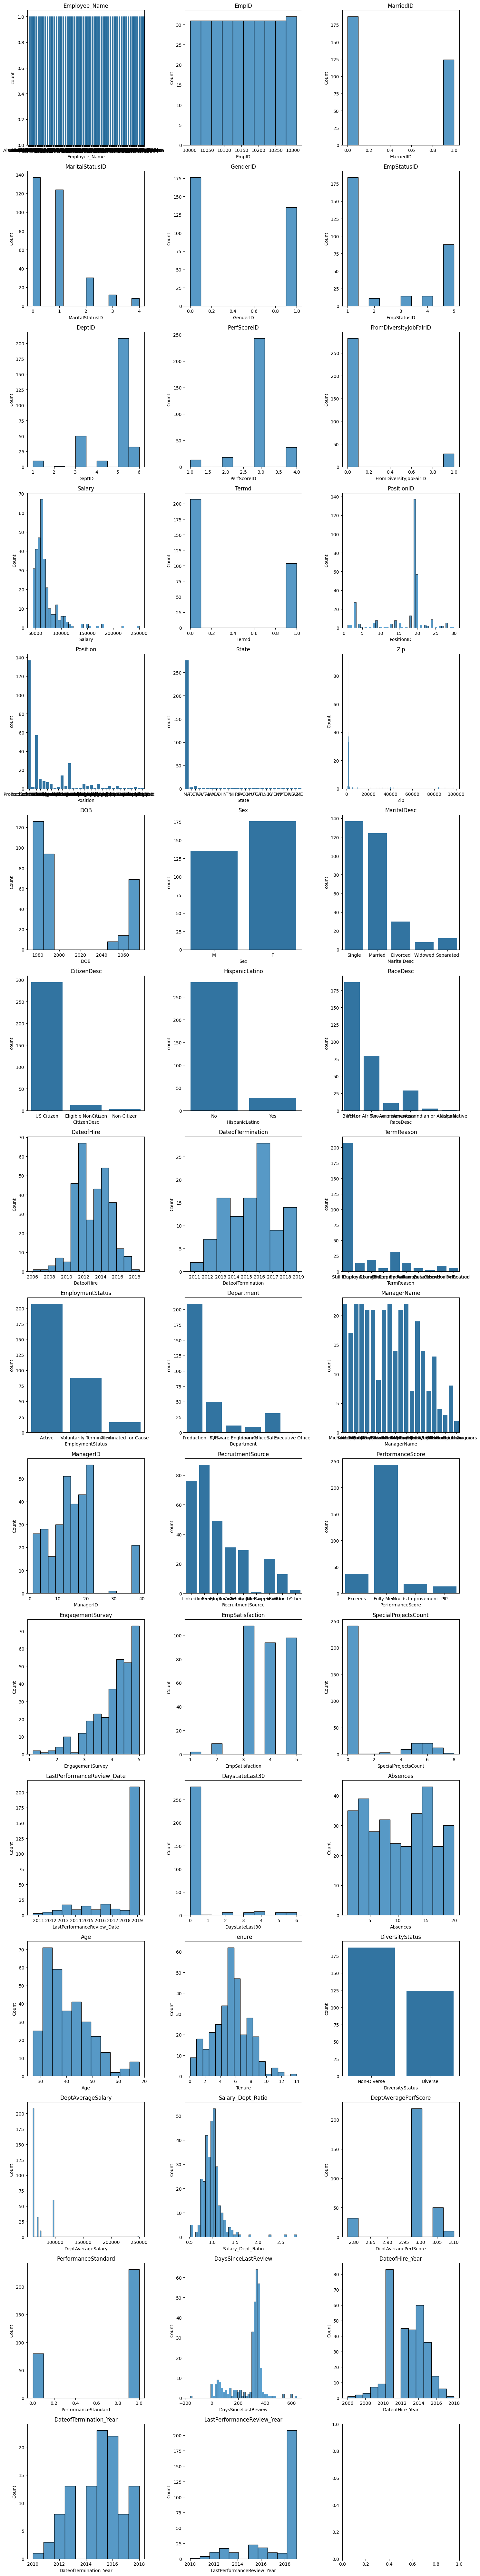

In [ ]:
def visualize_distributions(df, num_cols=3, figsize=(15, 5)):
    num_rows = int(np.ceil(len(df.columns) / num_cols))
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if df[col].dtype == 'object':
            sns.countplot(x=col, data=df, ax=ax)
        else:
            sns.histplot(x=col, data=df, ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

visualize_distributions(df_sub)

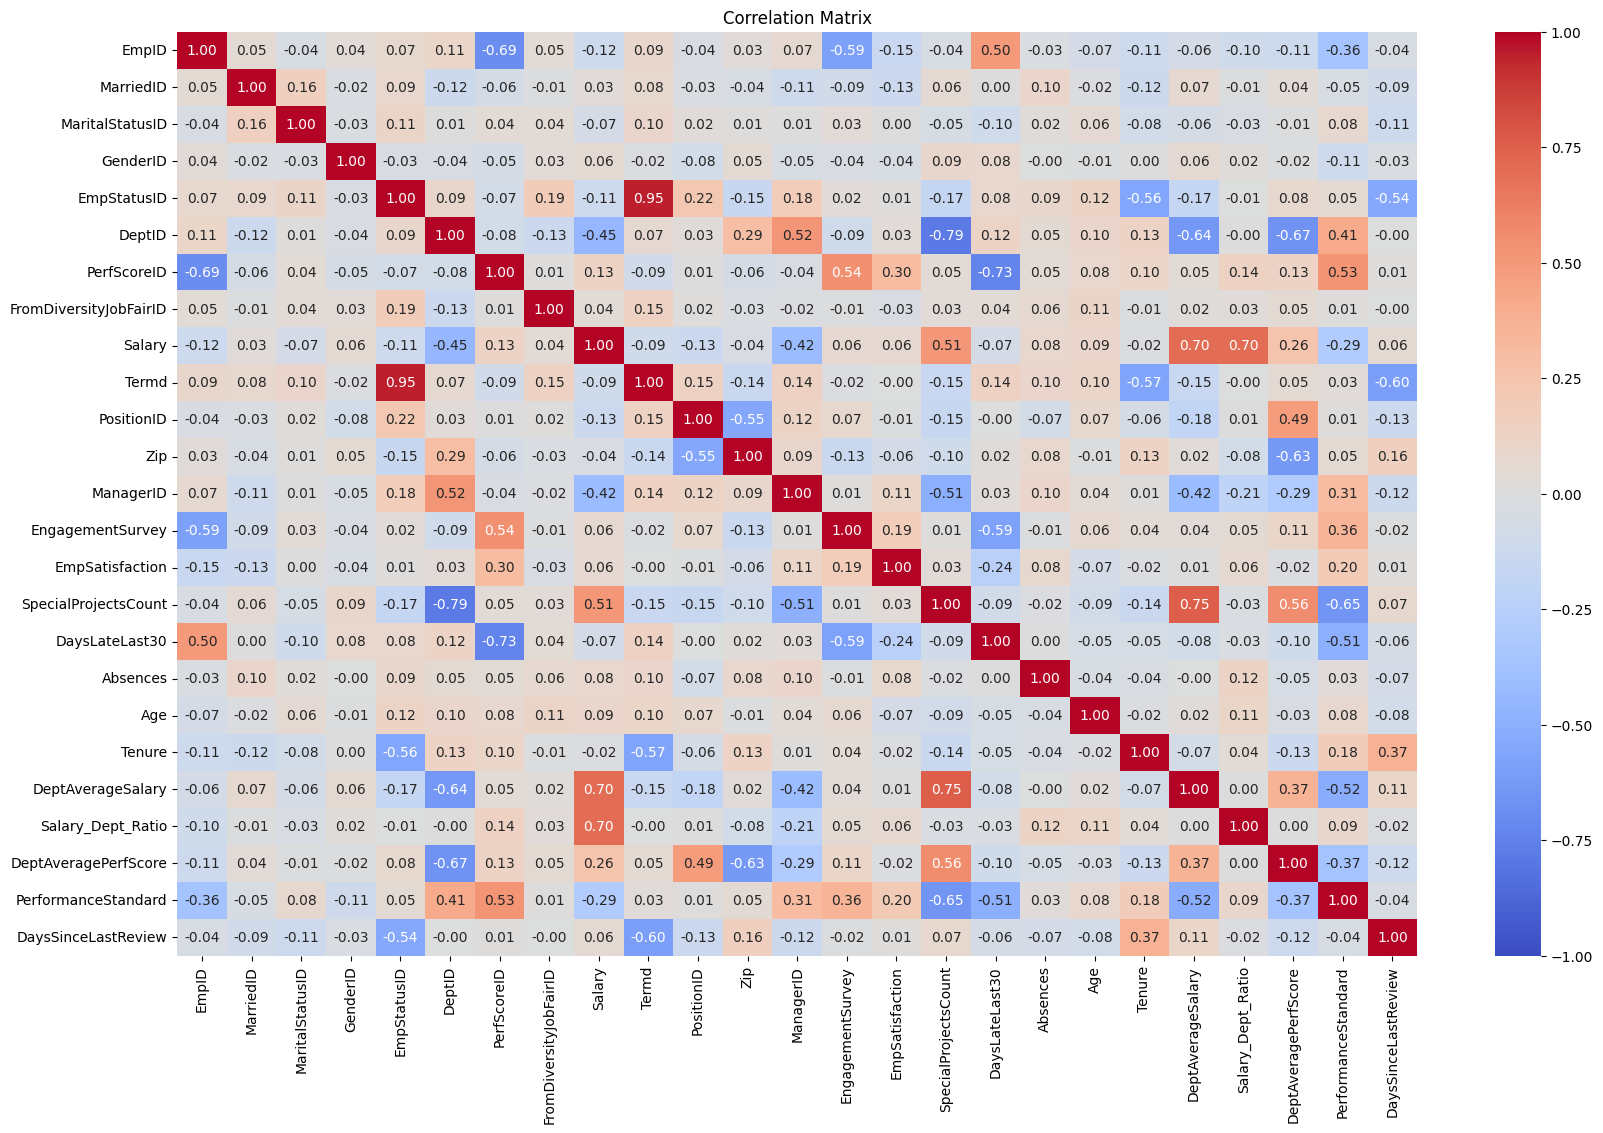

In [ ]:
# correlation matrix
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## **4. Conclusion**

This is a well rounded HR dataset that provides a plethora of employee information that we can gather important insights to relay back to the business/shareholder. The only downside to this dataset, is it doesn't show metrics over time. We can't decipher employee progression over time such as salary, promotion, performance, satisfaction, etc.

In [ ]:
speed_date(df)


Shape of DataFrame:  (311, 44)

Columns in DataFrame:  ['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Age', 'Tenure', 'DiversityStatus', 'DeptAverageSalary', 'Salary_Dept_Ratio', 'DeptAveragePerfScore', 'PerformanceStandard', 'DaysSinceLastReview']

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -

,count,mean,min,25%,50%,75%,max,std
EmpID,311.0,10156.0,10001.0,10078.5,10156.0,10233.5,10311.0,89.922189
MarriedID,311.0,0.398714,0.0,0.0,0.0,1.0,1.0,0.490423
MaritalStatusID,311.0,0.810289,0.0,0.0,1.0,1.0,4.0,0.943239
GenderID,311.0,0.434084,0.0,0.0,0.0,1.0,1.0,0.496435
EmpStatusID,311.0,2.392283,1.0,1.0,1.0,5.0,5.0,1.794383
DeptID,311.0,4.610932,1.0,5.0,5.0,5.0,6.0,1.083487
PerfScoreID,311.0,2.977492,1.0,3.0,3.0,3.0,4.0,0.587072
FromDiversityJobFairID,311.0,0.093248,0.0,0.0,0.0,0.0,1.0,0.291248
Salary,311.0,69020.684887,45046.0,55501.5,62810.0,72036.0,250000.0,25156.63693
Termd,311.0,0.334405,0.0,0.0,0.0,1.0,1.0,0.472542


- Feature engineered columns (added 9 columns, went from 39 to 44 columns)
- Cleaned the dataset (dealt with missing and duplicate entries, leading spaces, and misleading values)
- Visualized the data distributions and some correlations

In [ ]:
df.to_csv('cleaned_HRDataset.csv', index=False)
print('dataset has been saved')

dataset has been saved
